C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed


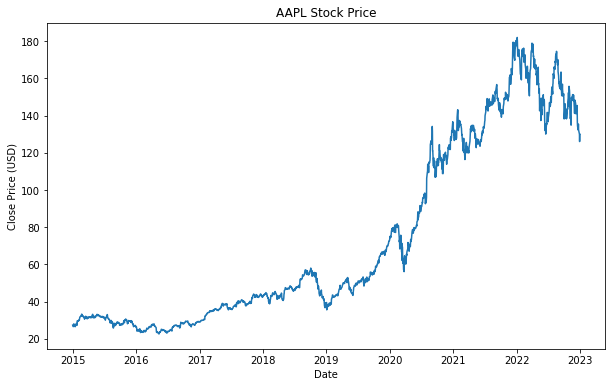

Training data shape: (1563, 60, 1)
Testing data shape: (391, 60, 1)


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0353 - val_loss: 0.0018
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.4838e-04 - val_loss: 0.0010
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.5878e-04 - val_loss: 0.0012
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.0571e-04 - val_loss: 7.9412e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.4587e-04 - val_loss: 7.6756e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.4230e-04 - val_loss: 9.8870e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 7.8540e-04 - val_loss: 9.7245e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 7.4818e-04 - val_loss: 9.1218e-04


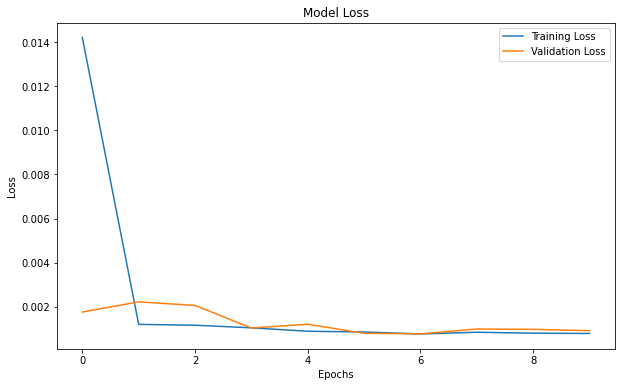

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


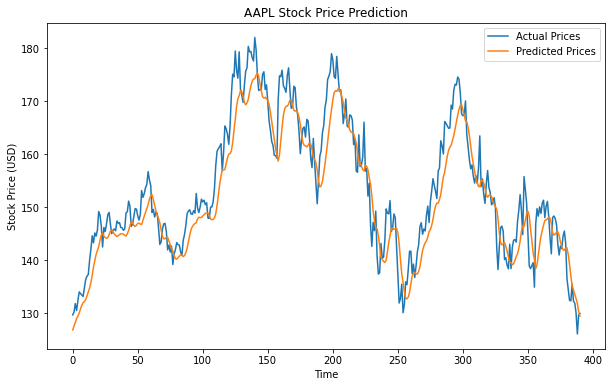

Root Mean Squared Error (RMSE): 4.8150


In [1]:
#Develop a GRU based term stock price prediction model for tickers in yahoo finance.

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

closing_prices = data['Close'].values
closing_prices = closing_prices.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

model = Sequential()

model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

predicted_prices = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

rmse = np.sqrt(np.mean((predicted_prices - y_test_actual)**2))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
